# Numpy advanced

## 1) Polynomials

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Defining a simple quadratic polynomial in python
p = np.poly1d([3, 2, -1]) # equivalent to 3(x^2) + 2x -1
print 'p(0): ',p(0)
print 'roots for p: ', p.roots
print 'order of p: ', p.order

p(0):  -1
roots for p:  [-1.          0.33333333]
order of p:  2


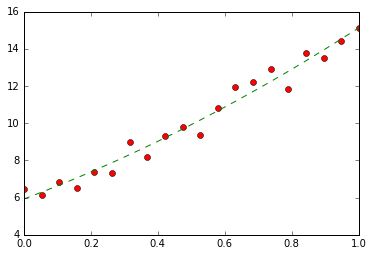

In [3]:
# simple operations with poly1d function
x = np.linspace(0,1,20)
y = 3*(x**2) + 6*x + 5 + 2*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 2))

# plotting to check if the function does what I think it does
plt.plot(x, y, 'ro', x, p(x), 'g--')
plt.show()

### To fit a 1d polynomial to a x, y data,  use p = np.polyfit(x, y, degree)

### However, in order to use a general polynomial or functions like Chebychev polynomial, numpy has another module numpy.polynomial.*() to perform numerous polynomial defining operation 

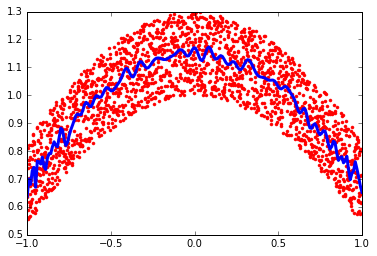

In [4]:
# Fitting a chebyshev polynomial to the data
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3 * np.random.rand(2000)

# Fitting the polynomial
p = np.polynomial.Chebyshev.fit(x, y, 90)
# now we can plot the above chebyshev polynomial over the following domain
t = np.linspace(-1, 1, 200)

# plotting
plt.plot(x, y, 'r.')
plt.plot(t, p(t), 'b-', lw=3)

### 2) Images

img_shape:  (2000L, 2000L, 4L)


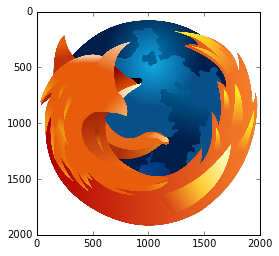

In [5]:
# Using matplotlib to read images
img = plt.imread('data/firefox.png')
print 'img_shape: ', img.shape

plt.imshow(img)

### 2016/03/02  Stopping at http://www.scipy-lectures.org/intro/numpy/exercises.html#picture-manipulation-framing-a-face

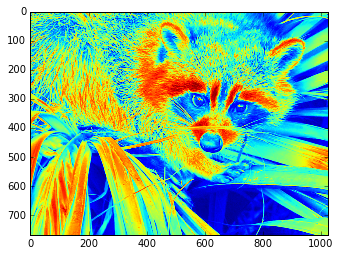

In [6]:
# Using Scipy for image manipulation
from scipy import misc
face = misc.face(gray=True)
plt.imshow(face)

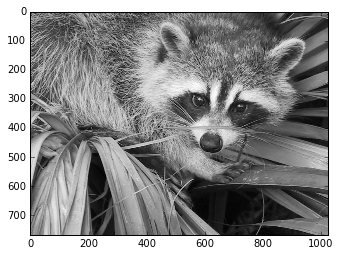

In [7]:
# We need to specify a color map to have it shown in gray
plt.imshow(face, cmap=plt.cm.gray)

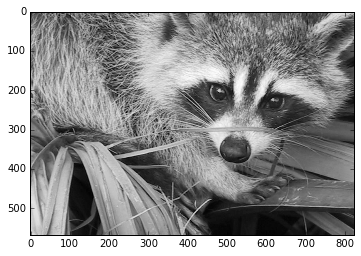

In [8]:
# In order to crop image we need to remove the edges of the image based on the coordinates that we see in the above gray scale
plt.imshow(face[100:-100, 100:-100], cmap=plt.cm.gray)

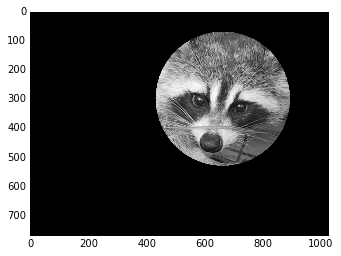

In [38]:
# now we are going to focus only on the face of the image
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx]
centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask]=0
plt.imshow(face, cmap=plt.cm.gray)

## Exercises

### 1) Data statistics

In [10]:
# Looking at the data
%ls

 Volume in drive C is OS
 Volume Serial Number is 8656-C43B

 Directory of C:\Users\bajpa\Desktop\Github\KaggleProjects

03/05/2016  12:24 PM    <DIR>          .
03/05/2016  12:24 PM    <DIR>          ..
03/02/2016  08:20 PM                13 .gitignore
03/04/2016  05:29 PM    <DIR>          .ipynb_checkpoints
03/04/2016  05:29 PM    <DIR>          data
02/29/2016  10:59 PM               209 ds_utils.py
02/28/2016  11:28 PM               297 ds_utils.pyc
03/05/2016  10:07 AM    <DIR>          MassiveData
03/05/2016  12:24 PM           775,648 numpyAdvanced.ipynb
02/28/2016  07:19 PM               126 README.md
03/05/2016  12:18 PM             9,000 refreshBasics.ipynb
03/05/2016  12:22 PM           317,293 refreshNumpy.ipynb
               7 File(s)      1,102,586 bytes
               5 Dir(s)  414,179,086,336 bytes free


In [11]:
# Importing the data
population_dat = np.loadtxt('data/populations.txt')
!cat 'data/populations.txt'

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [12]:
population_dat.shape

(21L, 4L)

In [13]:
# We need to transpose the population_dat matrix to collect column entries into a single variable
year, hare, lynx, carrot = population_dat.T

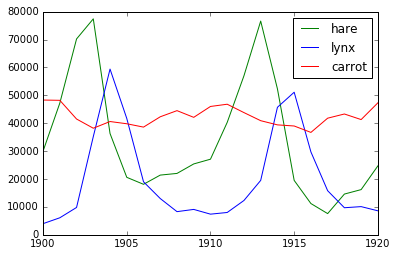

In [14]:
# We plot all the variables as a function of year
plt.plot(year, hare, 'g-', label='hare')
plt.plot(year, lynx, 'b-', label='lynx')
plt.plot(year, carrot, 'r-', label='carrot')
plt.legend()

In [15]:
# q1) Mean population and std dev of each species over the years
# First subset the data
mean_std_data = population_dat[:,1:]
mean_species = np.mean(mean_std_data, axis = 0)
stdDev_species = np.std(mean_std_data, axis=0)
print 'mean: ', mean_species
print 'stdDev: ', stdDev_species

mean:  [ 34080.95238095  20166.66666667  42400.        ]
stdDev:  [ 20897.90645809  16254.59153691   3322.50622558]


In [16]:
# q2) Year that saw the maximum population for each species
# First obtain the index for maximum population 
max_arg = np.argsort(mean_std_data, axis=0)
# Maxima year index for hare, lynx and carrot
maxima_id = max_arg[-1, :]
maxima_year = year[maxima_id]
print maxima_year

[ 1903.  1904.  1900.]


In [17]:
# q3) which species had max population for each year
max_species_arg = np.argsort(mean_std_data, axis=1)
maxima_spec_id = max_species_arg[:, -1]
species_arr = np.array(['H', 'L', 'C'])
max_spec = species_arr[maxima_spec_id]
print max_spec

['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']


In [18]:
# q4) which year any of the population is above 50000
boolean_arr = np.any(mean_std_data > 50000, axis=1)
print boolean_arr

# Extract the years
any_year = year[boolean_arr]
print any_year

[False False  True  True  True False False False False False False False
  True  True  True  True False False False False False]
[ 1902.  1903.  1904.  1912.  1913.  1914.  1915.]


In [19]:
# q5) top two years when the population of each species was lowest
# We already have the sorted arrays as max_arg
# Obtaining the two min indices for each species
min_two = max_arg[0:2, :]
print year[min_two]


[[ 1917.  1900.  1916.]
 [ 1916.  1901.  1903.]]


### 2) Crude integral approximations

In [20]:
# Writing a function that returns a^b-c
# We will need newaxis from numpy
from numpy import newaxis

def f(a, b, c):
    return (np.power(a, b) - c)

a = np.linspace(0, 1, 24)
b = np.linspace(0, 1, 12)
c = np.linspace(0, 1, 6)

matrix_vals = f(a[:, newaxis, newaxis], b[newaxis, :, newaxis], b[newaxis, newaxis, :])
approx_mean = np.mean(matrix_vals)
print 'approx_mean', approx_mean

approx_mean 0.18884234603


In [27]:
# The matrix manipulations using newaxis is not clear. Next few examples deal with understanding the dimensions of arrays
# A simple 1D array
A1 = np.arange(6)
print 'A1'
print A1
print 'A1 dim: ', A1.ndim
print 'A1 shape: ', A1.shape

A1
[0 1 2 3 4 5]
A1 dim:  1
A1 shape:  (6L,)


In [28]:
# Adding one more dimension using newaxis
A2_0 = A1[:, newaxis]
# A2_0 will have 6 rows and 1 column
print 'A2_0'
print A2_0
print 'A2_0 dim: ', A2_0.ndim
print 'A2_0 shape: ', A2_0.shape

A2_0
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
A2_0 dim:  2
A2_0 shape:  (6L, 1L)


In [29]:
A2_1 = A1[newaxis, :]
# A2_1 will have 1 row and 6 column
print 'A2_1'
print A2_1
print 'A2_1 dim: ', A2_1.ndim
print 'A2_1 shape: ', A2_1.shape

A2_1
[[0 1 2 3 4 5]]
A2_1 dim:  2
A2_1 shape:  (1L, 6L)


In [30]:
# Doing the above in 3D
A3_0 = A1[:, newaxis, newaxis]
# A2_0 will have 6 rows and 1 column and 1 layer
print 'A3_0'
print A3_0
print 'A3_0 dim: ', A3_0.ndim
print 'A3_0 shape: ', A3_0.shape

A3_0
[[[0]]

 [[1]]

 [[2]]

 [[3]]

 [[4]]

 [[5]]]
A3_0 dim:  3
A3_0 shape:  (6L, 1L, 1L)


In [31]:
A3_1 = A1[newaxis, :, newaxis]
# A2_1 will have 1 row and 6 column and 1 layer
print 'A3_1'
print A3_1
print 'A3_1 dim: ', A3_1.ndim
print 'A3_1 shape: ', A3_1.shape

A3_1
[[[0]
  [1]
  [2]
  [3]
  [4]
  [5]]]
A3_1 dim:  3
A3_1 shape:  (1L, 6L, 1L)


In [32]:
A3_2 = A1[newaxis, newaxis, :]
# A2_2 will have 1 row and 1 column and 6 layer
print 'A3_2'
print A3_2
print 'A3_2 dim: ', A3_2.ndim
print 'A3_2 shape: ', A3_2.shape

A3_2
[[[0 1 2 3 4 5]]]
A3_2 dim:  3
A3_2 shape:  (1L, 1L, 6L)


### The idea of arrays dimensions is clear now

### (3) Mandelbrot set

c:\python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in square
c:\python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in square
c:\python27\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in less


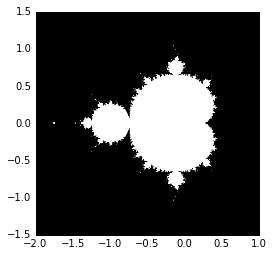

In [45]:
N_max = 50
t_hold = 50

x = np.linspace(-2, 1, 500)[:, newaxis]
y = np.linspace(-1.5, 1.5, 500)[newaxis, :]

# Creating the desired set
c = x +1j*y
z = c
for j in xrange(N_max):

    z = z**2 + c
    
mandelbrot_set = (abs(z) < t_hold)
                  
# plottigng the 
plt.imshow(mandelbrot_set.T,  extent=[-2, 1, -1.5, 1.5])
plt.gray()


## Skip the next section on matplotlib. Already know it well